In [1]:
import pandas as pd
import numpy as np
import copy
import os
from tqdm import tqdm

In [2]:
benchmark_directory = "/projects/mcmm/benchmark_2023-05-13/"

In [3]:
def extract_func_info_from_np_filename(np_fname):
    splitted = np_fname.lower().split("_")
    func = splitted[0]
    dim = int(splitted[1][:-1])
    info = {
        "function": func,
        "dimension": dim,
    }
    return info

In [4]:
def extract_obj_list_from_np_file(np_fpath):
    data = np.load(np_fpath)
    obj_list = data[:, 0].tolist()
    return obj_list

In [74]:
def populate_results_for_data_dir(data_dir_path):
    files = [fn for fn in os.listdir(data_dir_path) if fn.endswith('.npy')]

    results = []

    for file in tqdm(files):
        info = extract_func_info_from_np_filename(file)
        obj_list = extract_obj_list_from_np_file(os.path.join(data_dir_path, file))
        result_dict = copy.copy(info)
        result_dict['obj_list'] = obj_list
        result_dict['algorithm'] = "mcmm"

        results.append(result_dict)
    
    return results

In [132]:
data_dirs = [
    "Ackley_May12",
    "Levy_May12",
    "Michalewicz_May12",
]

In [148]:
all_mcmm_results = []
for data_dir in data_dirs:
    data_path = os.path.join(benchmark_directory, data_dir)
    print("Processing {}".format(data_path))
    results = populate_results_for_data_dir(data_path)
    
    all_mcmm_results += results

Processing /projects/mcmm/benchmark_2023-05-13/Ackley_May12


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 11.35it/s]


Processing /projects/mcmm/benchmark_2023-05-13/Levy_May12


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 12.21it/s]


Processing /projects/mcmm/benchmark_2023-05-13/Michalewicz_May12


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 26/26 [00:01<00:00, 20.20it/s]


In [149]:
def extract_func_info_from_np_filename_baseline(np_fname):
    splitted = np_fname.lower().split("_")
    func = splitted[0]
    dim = int(splitted[1])
    
    algorithm = None
    if "basinhopping" in np_fname:
        algorithm = "basinhopping"
    elif "differential_evolution" in np_fname:
        algorithm = "differential_evolution"
    elif "direct" in np_fname:
        algorithm = "direct"
    elif "dual_annealing" in np_fname:
        algorithm = "dual_annealing"
    elif "shgo" in np_fname:
        algorithm = "shgo"
    
    assert algorithm is not None, "Cannot extract algorithm from {}".format(np_fname)
    
    info = {
        "function": func,
        "dimension": dim,
        "algorithm": algorithm
    }
    return info

In [150]:
def extract_obj_list_from_np_file_baseline(np_fpath):
    data = np.load(np_fpath)
    obj_list = data
    return obj_list

In [151]:
def populate_results_for_data_dir_baseline(data_dir_path):
    files = [fn for fn in os.listdir(data_dir_path) if fn.endswith('.npy') and fn.strip(".npy").split('_')[-1] == 'Y']

    results = []

    for file in tqdm(files):
        info = extract_func_info_from_np_filename_baseline(file)
        obj_list = extract_obj_list_from_np_file_baseline(os.path.join(data_dir_path, file))
        result_dict = copy.copy(info)
        result_dict['obj_list'] = obj_list

        results.append(result_dict)
    
    return results

In [152]:
baseline_benchmark_directory = "/projects/mcmm/running_zhizhen_exps/baseline_results_displacement/record"
baseline_results = populate_results_for_data_dir_baseline(baseline_benchmark_directory)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 2448.05it/s]


In [153]:
pd.DataFrame(baseline_results)

,function,dimension,algorithm,obj_list
0,ackley,50,basinhopping,"[20.977924, 20.977924, 20.977924, 20.977924, 2..."
1,ackley,10,dual_annealing,"[21.551155, 21.254986, 21.6148, 20.65361, 21.1..."
2,ackley,100,shgo,[]
3,levy,200,differential_evolution,"[2679.1653, 2560.0386, 2496.3694, 2366.2039, 2..."
4,michalewicz,200,direct,"[-29.337063, -29.729198, -29.337063, -29.33706..."
...,...,...,...,...
209,ackley,100,shgo,[]
210,michalewicz,200,direct,"[-29.337063, -29.729198, -29.337063, -29.33706..."
211,ackley,200,shgo,[]
212,levy,200,direct,"[55.395985, 71.288795, 79.83413, 71.65342, 80...."


In [154]:
all_results = baseline_results + all_mcmm_results

In [155]:
def process_list(nums):
    result = []
    min_num = float('inf')  # initialize minimum value to positive infinity
    for num in nums:
        if num < min_num:
            min_num = num
        result.append(min_num)
    return result

In [156]:
df = pd.DataFrame(all_results)

In [157]:
df

,function,dimension,algorithm,obj_list
0,ackley,50,basinhopping,"[20.977924, 20.977924, 20.977924, 20.977924, 2..."
1,ackley,10,dual_annealing,"[21.551155, 21.254986, 21.6148, 20.65361, 21.1..."
2,ackley,100,shgo,[]
3,levy,200,differential_evolution,"[2679.1653, 2560.0386, 2496.3694, 2366.2039, 2..."
4,michalewicz,200,direct,"[-29.337063, -29.729198, -29.337063, -29.33706..."
...,...,...,...,...
275,michalewicz,200,mcmm,"[-24.308273315429688, -24.308273315429688, -24..."
276,michalewicz,50,mcmm,"[-6.8515753746032715, -6.8515753746032715, -6...."
277,michalewicz,10,mcmm,"[-0.029760561883449554, -0.029760561883449554,..."
278,michalewicz,200,mcmm,"[-21.56052017211914, -21.56052017211914, -21.5..."


In [158]:
df['min_found_list'] = df['obj_list'].apply(process_list)

In [159]:
ackley_df = df[df['function'] == 'ackley']

In [160]:
ackley_df

,function,dimension,algorithm,obj_list,min_found_list
0,ackley,50,basinhopping,"[20.977924, 20.977924, 20.977924, 20.977924, 2...","[20.977924, 20.977924, 20.977924, 20.977924, 2..."
1,ackley,10,dual_annealing,"[21.551155, 21.254986, 21.6148, 20.65361, 21.1...","[21.551155, 21.254986, 21.254986, 20.65361, 20..."
2,ackley,100,shgo,[],[]
6,ackley,100,basinhopping,"[21.148174, 21.148174, 21.148174, 21.148174, 2...","[21.148174, 21.148174, 21.148174, 21.148174, 2..."
8,ackley,100,dual_annealing,"[21.33648, 21.156425, 21.28254, 21.25705, 21.1...","[21.33648, 21.156425, 21.156425, 21.156425, 21..."
...,...,...,...,...,...
229,ackley,100,mcmm,"[21.352558135986328, 21.352558135986328, 21.35...","[21.352558135986328, 21.352558135986328, 21.35..."
230,ackley,50,mcmm,"[21.185546875, 21.185546875, 21.185546875, 20....","[21.185546875, 21.185546875, 21.185546875, 20...."
231,ackley,50,mcmm,"[21.311309814453125, 21.311309814453125, 21.31...","[21.311309814453125, 21.311309814453125, 21.31..."
232,ackley,100,mcmm,"[21.4476318359375, 21.4476318359375, 21.447631...","[21.4476318359375, 21.4476318359375, 21.447631..."


In [161]:
gathered_ackley_df = ackley_df.groupby(['function', 'dimension', 'algorithm']).agg(
    obj_lists=('obj_list', list),
    min_found_lists=('min_found_list', list)
).reset_index()

In [172]:
gathered_ackley_df

,function,dimension,algorithm,obj_lists,min_found_lists
0,ackley,10,basinhopping,"[[21.23412, 21.23412, 21.23412, 21.23412, 21.2...","[[21.23412, 21.23412, 21.23412, 21.23412, 21.2..."
1,ackley,10,differential_evolution,"[[20.970161, 21.383083, 21.541191, 21.367462, ...","[[20.970161, 20.970161, 20.970161, 20.970161, ..."
2,ackley,10,direct,"[[4.552539, 17.018728, 17.45362, 17.018728, 17...","[[4.552539, 4.552539, 4.552539, 4.552539, 4.55..."
3,ackley,10,dual_annealing,"[[21.551155, 21.254986, 21.6148, 20.65361, 21....","[[21.551155, 21.254986, 21.254986, 20.65361, 2..."
4,ackley,10,mcmm,"[[21.311416625976562, 21.311416625976562, 21.3...","[[21.311416625976562, 21.311416625976562, 21.3..."
5,ackley,10,shgo,"[[], [], [], [], []]","[[], [], [], [], []]"
6,ackley,50,basinhopping,"[[20.977924, 20.977924, 20.977924, 20.977924, ...","[[20.977924, 20.977924, 20.977924, 20.977924, ..."
7,ackley,50,differential_evolution,"[[21.292736, 21.280148, 21.31055, 21.252419, 2...","[[21.292736, 21.280148, 21.280148, 21.252419, ..."
8,ackley,50,direct,"[[4.552539, 11.409175, 11.779885, 11.409175, 1...","[[4.552539, 4.552539, 4.552539, 4.552539, 4.55..."
9,ackley,50,dual_annealing,"[[21.259396, 21.28978, 20.990498, 20.856647, 2...","[[21.259396, 21.259396, 20.990498, 20.856647, ..."


In [163]:
import matplotlib.pyplot as plt

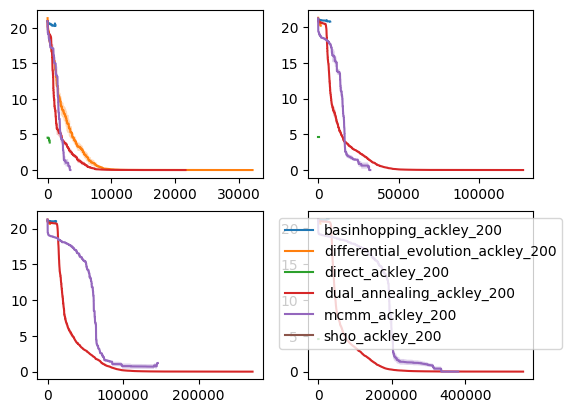

In [168]:
fig, axs = plt.subplots(2,2)
for row_idx in range(len(gathered_ackley_df)):
    df_row = gathered_ackley_df.iloc[row_idx]
    all_results = df_row['min_found_lists']
    label = "{}_{}_{}".format(df_row['algorithm'], df_row['function'], df_row['dimension'])
    pd_all_results = pd.DataFrame(all_results)
    means = pd_all_results.mean(axis = 0).to_numpy()
    err = pd_all_results.std(axis=0).fillna(0).to_numpy()
    
    if df_row['dimension'] == 10:
        ax = axs[0][0]
    elif df_row['dimension'] == 50:
        ax = axs[0][1]
    elif df_row['dimension'] == 100:
        ax = axs[1][0]
    elif df_row['dimension'] == 200:
        ax = axs[1][1]
        
    ax.plot([i for i in range(len(means))], means, label=label)
    ax.fill_between([i for i in range(len(means))], means - err / 2, means + err / 2, alpha=0.3)
    
plt.legend(loc='upper center')

10
10
10
10
10
10
50
50
50
50
50
50
100
100
100
100
100
100
200
200
200
200
200
200


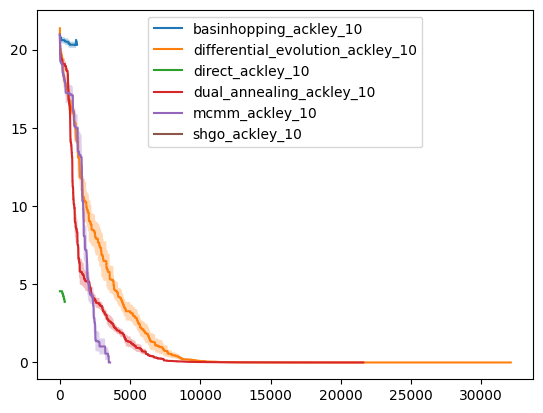

In [174]:
fig, ax = plt.subplots()
for row_idx in range(len(gathered_ackley_df)):
    df_row = gathered_ackley_df.iloc[row_idx]
    print(df_row['dimension'])
    if df_row['dimension'] != 10:
        continue
        
    
    all_results = df_row['min_found_lists']
    label = "{}_{}_{}".format(df_row['algorithm'], df_row['function'], df_row['dimension'])
    pd_all_results = pd.DataFrame(all_results)
    means = pd_all_results.mean(axis = 0).to_numpy()
    err = pd_all_results.std(axis=0).fillna(0).to_numpy()
        
    ax.plot([i for i in range(len(means))], means, label=label)
    ax.fill_between([i for i in range(len(means))], means - err / 2, means + err / 2, alpha=0.3)
    
plt.legend(loc='upper center')

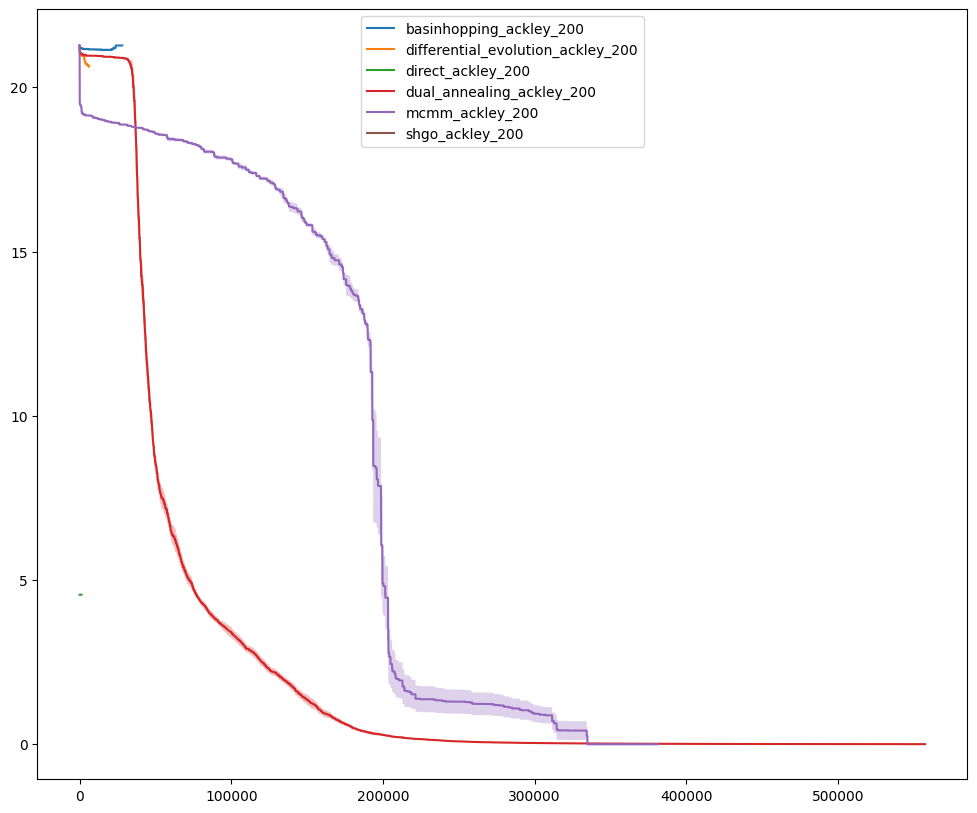

In [179]:
fig, ax = plt.subplots(figsize=(12,10))
for row_idx in range(len(gathered_ackley_df)):
    df_row = gathered_ackley_df.iloc[row_idx]
    if df_row['dimension'] != 200:
        continue
        
    
    all_results = df_row['min_found_lists']
    label = "{}_{}_{}".format(df_row['algorithm'], df_row['function'], df_row['dimension'])
    pd_all_results = pd.DataFrame(all_results)
    means = pd_all_results.mean(axis = 0).to_numpy()
    err = pd_all_results.std(axis=0).fillna(0).to_numpy()
        
    ax.plot([i for i in range(len(means))], means, label=label)
    ax.fill_between([i for i in range(len(means))], means - err / 2, means + err / 2, alpha=0.3)
    
plt.legend(loc='upper center')